###### Maestría Inteligencia de Negocios y Análisis de Datos
###### Curso: Statistical Learning I
###### Alumno: 22008375- Leonel Eduardo Contreras
###### Sección L

## Laboratorio 2

#### Importar libreriras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### Cargar archivo

In [2]:
dataset=pd.read_csv("train_HP.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Explorar archivo

In [3]:
## Columnas del dataset
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
## Tipos de datos
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
##Cantidad de registros y forma
dataset.shape

(1460, 81)

#### Buscar columnas con valores Nulos

In [7]:
col_null=[] ##Se crea una lista vacia que se llenará con las columnas con nulos

for col in dataset.columns:
    if dataset[col].isnull().any()==1:
       col_null.append(col) 
print(col_null)
print(f"El dataset tiene: {len(col_null)} columnas con Null")

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
El dataset tiene: 19 columnas con Null


In [8]:
##El tipo de dato de las 19 columnas con Null
dataset[col_null].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [9]:
##Media de la cantidad de registros con Null de las 19 columnas
dataset[col_null].isnull().mean()


LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [10]:
'''Eiminar aquellas columnas que no agregan valor al dataset.
    Es decir aquellas que tengan una media de nulos mayor a 0.05
    La variable col_rescatables deja las columnas sin nulos o con nulos menores a una media de 0.05'''

col_rescatables=[]

for col in dataset.columns:
    if dataset[col].isnull().mean()<=0.05:
        col_rescatables.append(col)

print(col_rescatables)
print(f"Las columnas rescatables son: {len(col_rescatables)}")


['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']
Las columnas rescatables son: 70


In [11]:
'''Interseccion de todas las columnas rescatables con las columnas con nulo, 
para obtener las que se deben imputar para completar el Nulo'''


col_null_rescatables=list(set(col_rescatables).intersection(set(col_null))) 
col_null_rescatables

##De las 19 columnas que tenian nulos se eliminaron 11 que no eran rescatables y se dejaron 8 rescatables a imputar

['MasVnrArea',
 'MasVnrType',
 'BsmtFinType2',
 'BsmtQual',
 'Electrical',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtExposure']

In [12]:
##Tipo de dato de las 8 columnas que hay que imputar
dataset[col_null_rescatables].dtypes

MasVnrArea      float64
MasVnrType       object
BsmtFinType2     object
BsmtQual         object
Electrical       object
BsmtCond         object
BsmtFinType1     object
BsmtExposure     object
dtype: object

#### Imputación

##### Imputación Media y Mediana

In [13]:
## La unica variable para imputación con dato numerico es MasVnrArea

## Validar si se imputa con la Media o Mediana los Nulos

media=dataset['MasVnrArea'].mean()
mediana=dataset['MasVnrArea'].median()

print(f"Media:{media}")
print(f"Mediana:{mediana}")

Media:103.68526170798899
Mediana:0.0


In [14]:
## Se agregan dos columnas nuevas con la imputación de valores nulos, una con la media y otra con la mediana
dataset['MasVnrArea_Mean']=np.round(dataset['MasVnrArea'].fillna(media),0)
dataset['MasVnrArea_Median']=np.round(dataset['MasVnrArea'].fillna(mediana),0)
dataset[['MasVnrArea','SalePrice','MasVnrArea_Mean','MasVnrArea_Median']]


,MasVnrArea,SalePrice,MasVnrArea_Mean,MasVnrArea_Median
0,196.0,208500,196.0,196.0
1,0.0,181500,0.0,0.0
2,162.0,223500,162.0,162.0
3,0.0,140000,0.0,0.0
4,350.0,250000,350.0,350.0
...,...,...,...,...
1455,0.0,175000,0.0,0.0
1456,119.0,210000,119.0,119.0
1457,0.0,266500,0.0,0.0
1458,0.0,142125,0.0,0.0


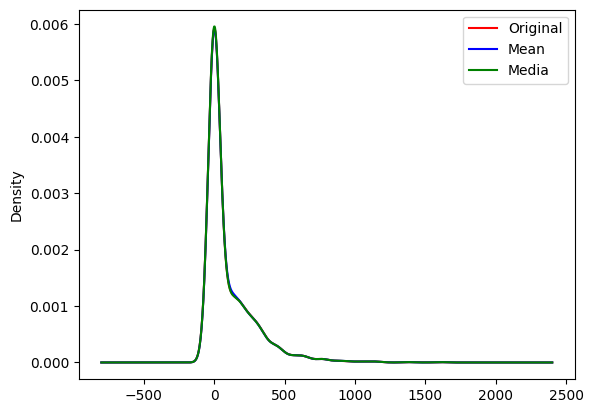

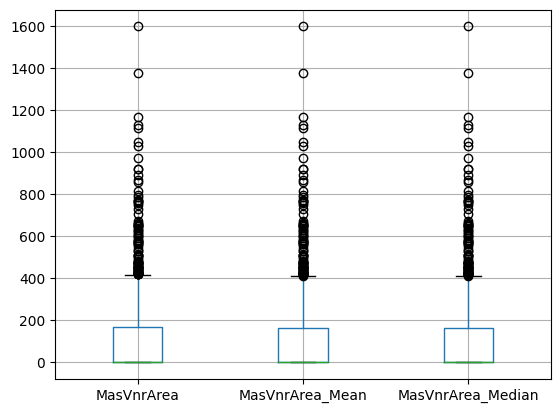

In [15]:
##Graficas para observar la distorcion entre la variable original, la imputación de media y la imputación de mediana
fig=plt.figure()
ax=fig.add_subplot(111)

dataset['MasVnrArea'].plot.density(color='red',label='Original')
dataset['MasVnrArea_Mean'].plot.density(color='blue',label='Mean')
dataset['MasVnrArea_Median'].plot.density(color='green',label='Media')
ax.legend()
plt.show()

dataset[['MasVnrArea','MasVnrArea_Mean','MasVnrArea_Median']].boxplot()
plt.show()

In [16]:
##No hay diferencia o distorcion entre imputar con la media o la mediana

##Se elige la media para imputar los nulos y se convierte la columna original en la columna nueva sin nulos

dataset['MasVnrArea']=dataset['MasVnrArea_Mean']

##Eliminar las columnas creadas de media y mediana, que sirvieron solo para analizar, para volver al dataset original pero con la columna imputada

dataset.drop(['MasVnrArea_Mean','MasVnrArea_Median'],axis=1,inplace=True)



##### Imputación Categorica

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


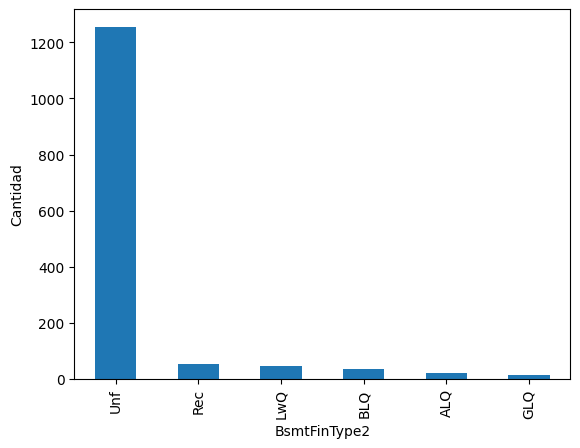

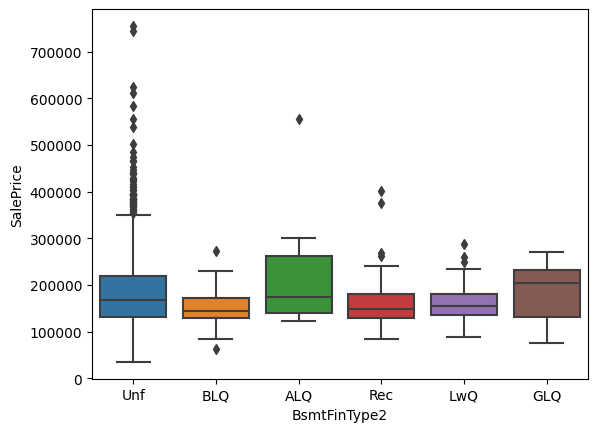

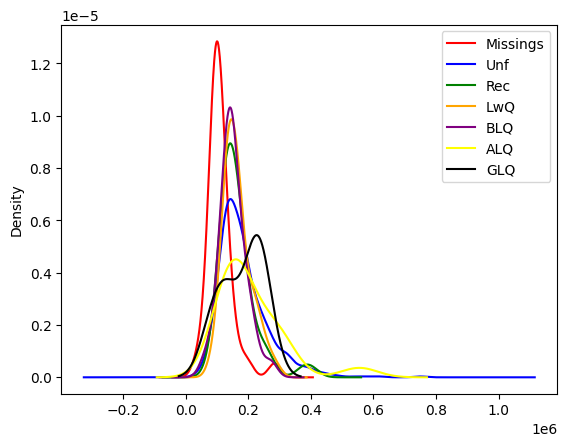

'Se elige BLQ para imputar a los nulos, es la que mas se asemeja a la Missings'

In [17]:
## De las 8 columnas que hay que imputar la primera categorica es: BsmtFinType2

print(dataset['BsmtFinType2'].value_counts()) ##Conteo de valores de cada categoria

dataset['BsmtFinType2'].value_counts().plot.bar() ##Grafica de barras del conteo de cada categoria
plt.ylabel('Cantidad')
plt.xlabel('BsmtFinType2')
plt.show()

sns.boxplot(x=dataset['BsmtFinType2'],y=dataset['SalePrice']) ##Grafica de caja de cada categoria
plt.show()

fig = plt.figure() ##Grafica de distribucion de cada categoria para analizar cual se comporta parecido a los nulos
ax = fig.add_subplot(111)

dataset[dataset['BsmtFinType2'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset[dataset['BsmtFinType2'] == 'Unf']['SalePrice'].plot(kind="kde", color="blue", label="Unf")
dataset[dataset['BsmtFinType2'] == 'Rec']['SalePrice'].plot(kind="kde", color="green", label="Rec")
dataset[dataset['BsmtFinType2'] == 'LwQ']['SalePrice'].plot(kind="kde", color="orange", label="LwQ")
dataset[dataset['BsmtFinType2'] == 'BLQ']['SalePrice'].plot(kind="kde", color="purple", label="BLQ")
dataset[dataset['BsmtFinType2'] == 'ALQ']['SalePrice'].plot(kind="kde", color="yellow", label="ALQ")
dataset[dataset['BsmtFinType2'] == 'GLQ']['SalePrice'].plot(kind="kde", color="black", label="GLQ")
ax.legend()
plt.show()

'''Se elige BLQ para imputar a los nulos, es la que mas se asemeja a la Missings'''

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


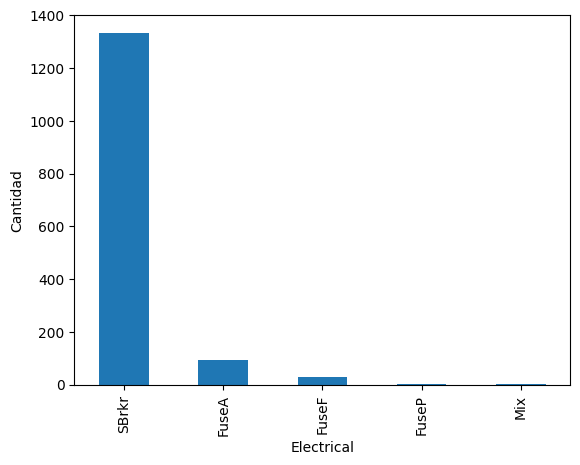

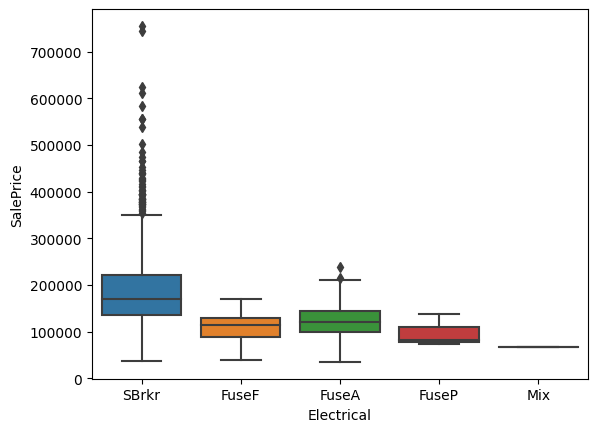

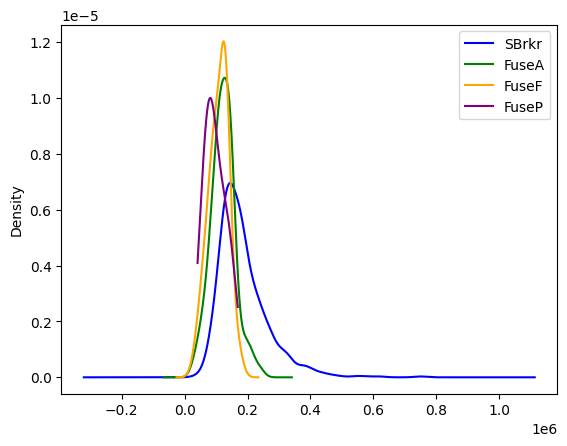

Valor nulo: 1379    167500
Name: SalePrice, dtype: int64
---
                 Promedio
Electrical               
FuseA       122196.893617
FuseF       107675.444444
FuseP        97333.333333
Mix          67000.000000
SBrkr       186825.113193


'Se elimina Missings y Mix de la grafica de densidad por tener un solo valor (no se puede graficar),\n    Se elige SBrkr para imputar a los nulos por tener la media de SalePrice mas cerca de la media SalesPrice del valor Nulo'

In [18]:
## De las 8 columnas que hay que imputar la segunda categorica que es: Electrical

print(dataset['Electrical'].value_counts()) ##Conteo de valores de cada categoria

dataset['Electrical'].value_counts().plot.bar() ##Grafica de barras del conteo de cada categoria
plt.ylabel('Cantidad')
plt.xlabel('Electrical')
plt.show()

sns.boxplot(x=dataset['Electrical'],y=dataset['SalePrice']) ##Grafica de caja de cada categoria
plt.show()

fig = plt.figure() ##Grafica de distribucion de cada categoria para analizar cual se comporta parecido a los nulos
ax = fig.add_subplot(111)

#dataset[dataset['Electrical'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset[dataset['Electrical'] == 'SBrkr']['SalePrice'].plot(kind="kde", color="blue", label="SBrkr")
dataset[dataset['Electrical'] == 'FuseA']['SalePrice'].plot(kind="kde", color="green", label="FuseA")
dataset[dataset['Electrical'] == 'FuseF']['SalePrice'].plot(kind="kde", color="orange", label="FuseF")
dataset[dataset['Electrical'] == 'FuseP']['SalePrice'].plot(kind="kde", color="purple", label="FuseP")
#dataset[dataset['Electrical'] == 'Mix ']['SalePrice'].plot(kind="kde", color="yellow", label="Mix ")

ax.legend()
plt.show()


dataset['Electrical'].value_counts()

print("Valor nulo:",dataset[dataset['Electrical'].isnull()==True]['SalePrice'])
print("---")
print(dataset.groupby('Electrical').agg(Promedio=('SalePrice',np.mean)))

'''Se elimina Missings y Mix de la grafica de densidad por tener un solo valor (no se puede graficar),
    Se elige SBrkr para imputar a los nulos por tener la media de SalePrice mas cerca de la media SalesPrice del valor Nulo'''



None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


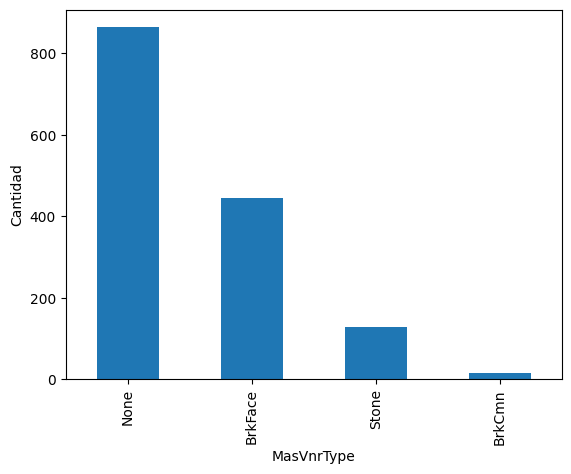

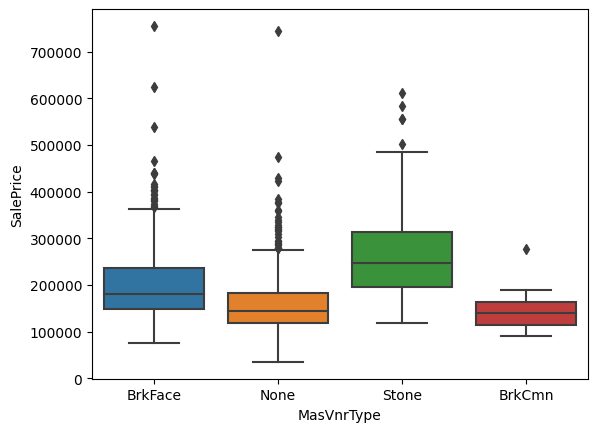

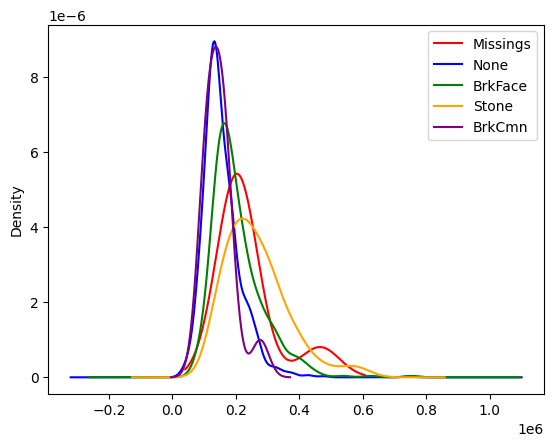

'Se elige Stone para imputar a los nulos, es la que mas se asemeja a la Missings'

In [19]:
## De las 8 columnas que hay que imputar la tercera categorica que es: MasVnrType

print(dataset['MasVnrType'].value_counts()) ##Conteo de valores de cada categoria

dataset['MasVnrType'].value_counts().plot.bar() ##Grafica de barras del conteo de cada categoria
plt.ylabel('Cantidad')
plt.xlabel('MasVnrType')
plt.show()

sns.boxplot(x=dataset['MasVnrType'],y=dataset['SalePrice']) ##Grafica de caja de cada categoria
plt.show()

fig = plt.figure() ##Grafica de distribucion de cada categoria para analizar cual se comporta parecido a los nulos
ax = fig.add_subplot(111)

dataset[dataset['MasVnrType'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset[dataset['MasVnrType'] == 'None']['SalePrice'].plot(kind="kde", color="blue", label="None")
dataset[dataset['MasVnrType'] == 'BrkFace']['SalePrice'].plot(kind="kde", color="green", label="BrkFace")
dataset[dataset['MasVnrType'] == 'Stone']['SalePrice'].plot(kind="kde", color="orange", label="Stone")
dataset[dataset['MasVnrType'] == 'BrkCmn']['SalePrice'].plot(kind="kde", color="purple", label="BrkCmn")

ax.legend()
plt.show()

'''Se elige Stone para imputar a los nulos, es la que mas se asemeja a la Missings'''


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


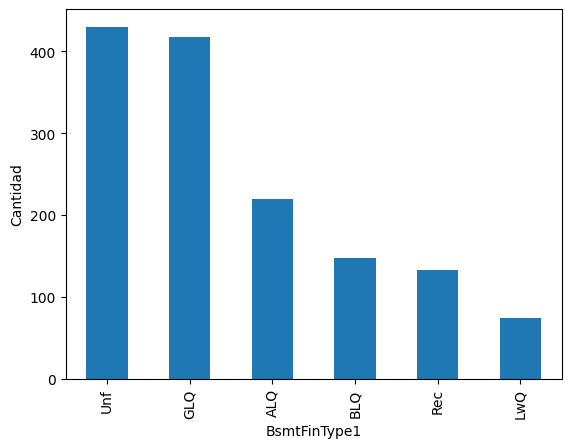

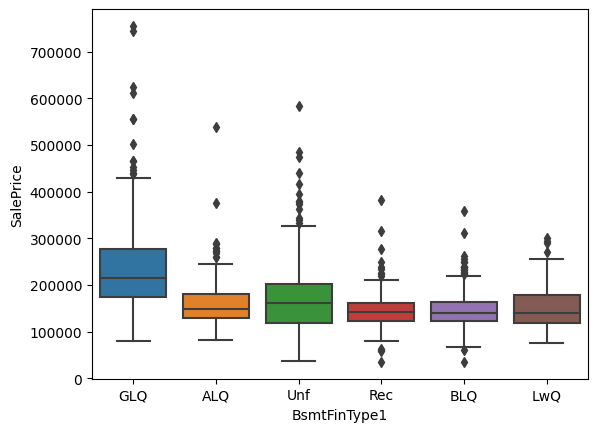

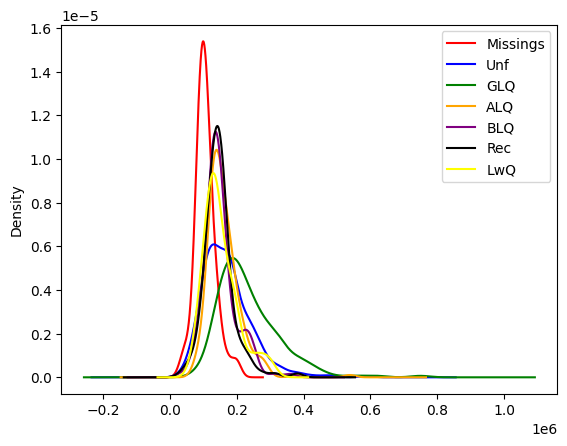

'Se elige Rec para imputar a los nulos, es la que mas se asemeja a la Missings'

In [20]:
## De las 8 columnas que hay que imputar la cuarta categorica que es: BsmtFinType1

print(dataset['BsmtFinType1'].value_counts()) ##Conteo de valores de cada categoria

dataset['BsmtFinType1'].value_counts().plot.bar() ##Grafica de barras del conteo de cada categoria
plt.ylabel('Cantidad')
plt.xlabel('BsmtFinType1')
plt.show()

sns.boxplot(x=dataset['BsmtFinType1'],y=dataset['SalePrice']) ##Grafica de caja de cada categoria
plt.show()

fig = plt.figure() ##Grafica de distribucion de cada categoria para analizar cual se comporta parecido a los nulos
ax = fig.add_subplot(111)

dataset[dataset['BsmtFinType1'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset[dataset['BsmtFinType1'] == 'Unf']['SalePrice'].plot(kind="kde", color="blue", label="Unf")
dataset[dataset['BsmtFinType1'] == 'GLQ']['SalePrice'].plot(kind="kde", color="green", label="GLQ")
dataset[dataset['BsmtFinType1'] == 'ALQ']['SalePrice'].plot(kind="kde", color="orange", label="ALQ")
dataset[dataset['BsmtFinType1'] == 'BLQ']['SalePrice'].plot(kind="kde", color="purple", label="BLQ")
dataset[dataset['BsmtFinType1'] == 'Rec']['SalePrice'].plot(kind="kde", color="black", label="Rec")
dataset[dataset['BsmtFinType1'] == 'LwQ']['SalePrice'].plot(kind="kde", color="yellow", label="LwQ")

ax.legend()
plt.show()

'''Se elige Rec para imputar a los nulos, es la que mas se asemeja a la Missings'''

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


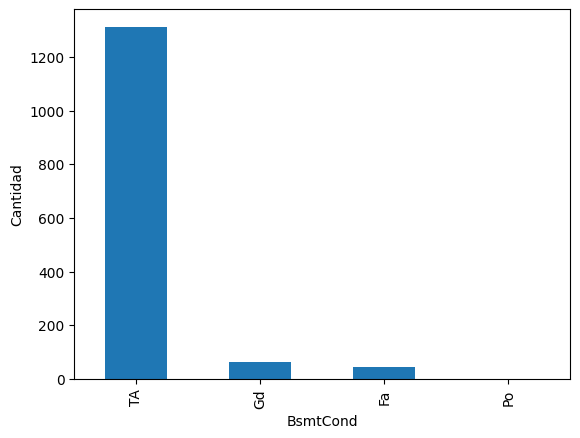

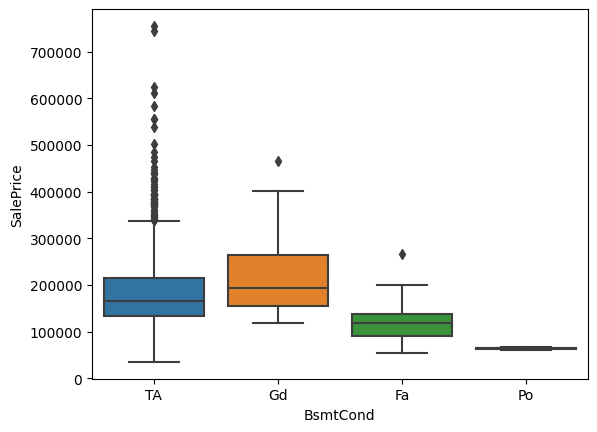

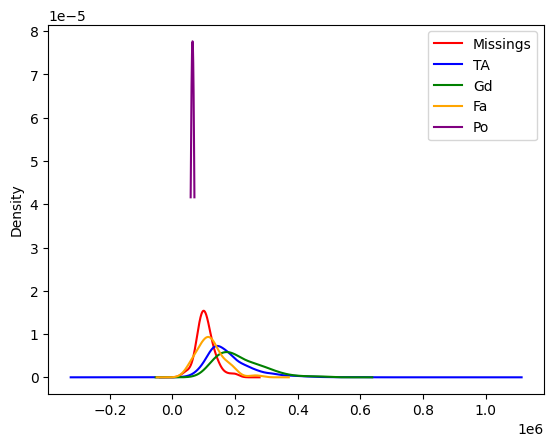

'Se elige Fa para imputar a los nulos, es la que mas se asemeja a la Missings'

In [21]:
## De las 8 columnas que hay que imputar la quinta categorica que es: BsmtCond

print(dataset['BsmtCond'].value_counts()) ##Conteo de valores de cada categoria

dataset['BsmtCond'].value_counts().plot.bar() ##Grafica de barras del conteo de cada categoria
plt.ylabel('Cantidad')
plt.xlabel('BsmtCond')
plt.show()

sns.boxplot(x=dataset['BsmtCond'],y=dataset['SalePrice']) ##Grafica de caja de cada categoria
plt.show()

fig = plt.figure() ##Grafica de distribucion de cada categoria para analizar cual se comporta parecido a los nulos
ax = fig.add_subplot(111)

dataset[dataset['BsmtCond'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset[dataset['BsmtCond'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset[dataset['BsmtCond'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataset[dataset['BsmtCond'] == 'Fa']['SalePrice'].plot(kind="kde", color="orange", label="Fa")
dataset[dataset['BsmtCond'] == 'Po']['SalePrice'].plot(kind="kde", color="purple", label="Po")


ax.legend()
plt.show()

'''Se elige Fa para imputar a los nulos, es la que mas se asemeja a la Missings'''

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


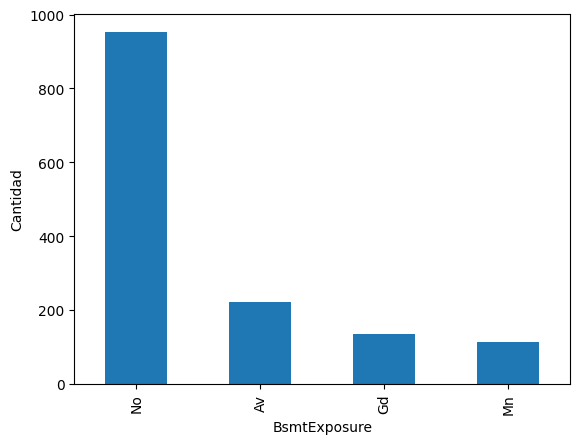

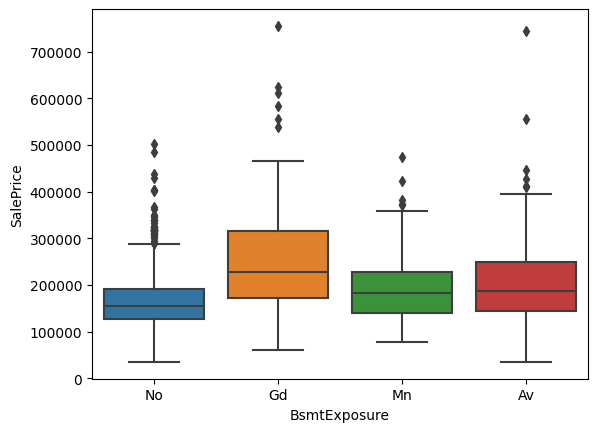

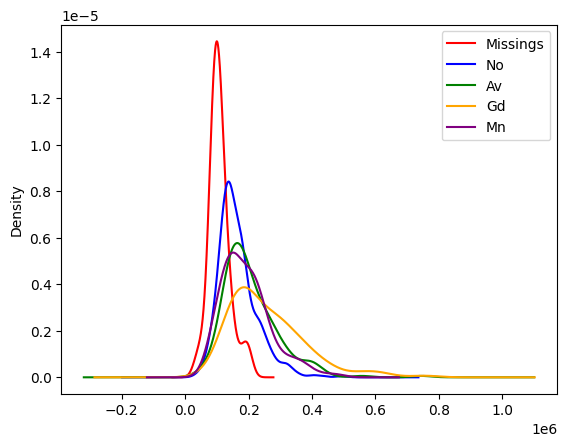

'Se elige No para imputar a los nulos, es la que mas se asemeja a la Missings'

In [22]:
## De las 8 columnas que hay que imputar la sexta categorica que es: BsmtExposure

print(dataset['BsmtExposure'].value_counts()) ##Conteo de valores de cada categoria

dataset['BsmtExposure'].value_counts().plot.bar() ##Grafica de barras del conteo de cada categoria
plt.ylabel('Cantidad')
plt.xlabel('BsmtExposure')
plt.show()

sns.boxplot(x=dataset['BsmtExposure'],y=dataset['SalePrice']) ##Grafica de caja de cada categoria
plt.show()

fig = plt.figure() ##Grafica de distribucion de cada categoria para analizar cual se comporta parecido a los nulos
ax = fig.add_subplot(111)

dataset[dataset['BsmtExposure'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset[dataset['BsmtExposure'] == 'No']['SalePrice'].plot(kind="kde", color="blue", label="No")
dataset[dataset['BsmtExposure'] == 'Av']['SalePrice'].plot(kind="kde", color="green", label="Av")
dataset[dataset['BsmtExposure'] == 'Gd']['SalePrice'].plot(kind="kde", color="orange", label="Gd")
dataset[dataset['BsmtExposure'] == 'Mn']['SalePrice'].plot(kind="kde", color="purple", label="Mn")


ax.legend()
plt.show()

'''Se elige No para imputar a los nulos, es la que mas se asemeja a la Missings'''

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


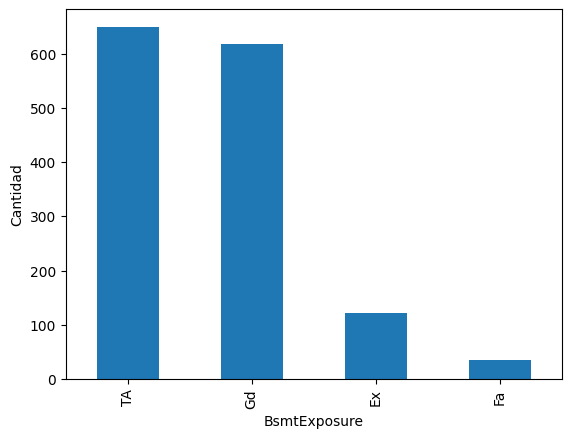

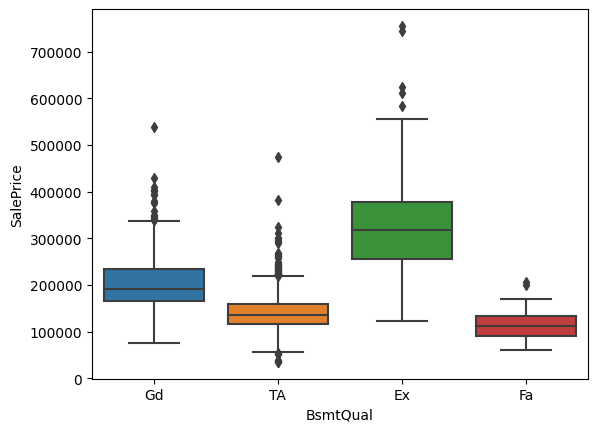

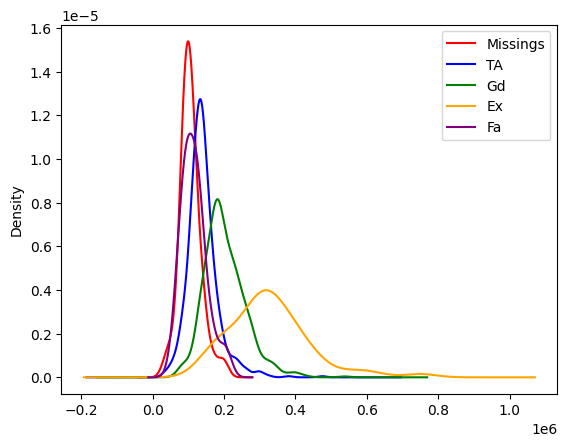

'Se elige Fa para imputar a los nulos, es la que mas se asemeja a la Missings'

In [23]:
## De las 8 columnas que hay que imputar la septima categorica que es: BsmtQual

print(dataset['BsmtQual'].value_counts()) ##Conteo de valores de cada categoria

dataset['BsmtQual'].value_counts().plot.bar() ##Grafica de barras del conteo de cada categoria
plt.ylabel('Cantidad')
plt.xlabel('BsmtExposure')
plt.show()

sns.boxplot(x=dataset['BsmtQual'],y=dataset['SalePrice']) ##Grafica de caja de cada categoria
plt.show()

fig = plt.figure() ##Grafica de distribucion de cada categoria para analizar cual se comporta parecido a los nulos
ax = fig.add_subplot(111)

dataset[dataset['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset[dataset['BsmtQual'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset[dataset['BsmtQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataset[dataset['BsmtQual'] == 'Ex']['SalePrice'].plot(kind="kde", color="orange", label="Ex")
dataset[dataset['BsmtQual'] == 'Fa']['SalePrice'].plot(kind="kde", color="purple", label="Fa")


ax.legend()
plt.show()

'''Se elige Fa para imputar a los nulos, es la que mas se asemeja a la Missings'''

In [24]:
##Se imputan las variables categoricas
dataset['BsmtFinType2'].fillna('BLQ',inplace=True) 
dataset['Electrical'].fillna('SBrkr',inplace=True) 
dataset['MasVnrType'].fillna('Stone',inplace=True) 
dataset['BsmtFinType1'].fillna('Rec',inplace=True) 
dataset['BsmtCond'].fillna('Fa',inplace=True) 
dataset['BsmtExposure'].fillna('No',inplace=True) 
dataset['BsmtQual'].fillna('Fa',inplace=True) 



In [25]:
'''Se crea el nuevo dataset
    Con la imputación de Nulos (columnas rescatables, 8 columnas) 
    y sin las columnas con muchos nulos (columnas no rescatables mayores a 0.05 de media de nulos, 11 Columnas)'''

dataset=dataset[col_rescatables]


In [26]:
##Se valida si el nuevo dataset tiene nulos

cols_con_na=[col for col in dataset.columns if(dataset[col].isnull().mean()>0)]
len(cols_con_na)

0

### Codificación de variables categoricas

In [27]:
##Se obtienen las variables que son categoricas

def getCategoryVars(dataset):
    cat_colnames=[]
    colnames=dataset.columns
    for col in colnames:
        if(dataset[col].dtype=='object'):
            cat_colnames.append(col)
    return cat_colnames

cat_cols=getCategoryVars(dataset)
print(cat_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [28]:
'''Se obtienen las variables que son categoricas para hacer One Hot Encoding.
    Aquellas que tengan 3 o menos categorias diferentes'''

one_hot_encoding=[]

for i in cat_cols:
    if len(dataset.groupby(i).count())<=3:
        print("-----")
        print(dataset[i].value_counts().sort_values(ascending=False))
        one_hot_encoding.append(i)
print(f"Las variables para hacer One Hot Encoding son: {one_hot_encoding}")

## La variables para hacer One Hot Encoding son ['Street', 'Utilities', 'LandSlope', 'CentralAir', 'PavedDrive']

-----
Pave    1454
Grvl       6
Name: Street, dtype: int64
-----
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
-----
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
-----
Y    1365
N      95
Name: CentralAir, dtype: int64
-----
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
Las variables para hacer One Hot Encoding son: ['Street', 'Utilities', 'LandSlope', 'CentralAir', 'PavedDrive']


In [29]:
##Funcion para hacer One Hot Encoding a las variables que aplican

dataset_one=pd.get_dummies(dataset[one_hot_encoding])
dataset_one


,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,0,1,1,0,1,0,0,0,1,0,0,1
1,0,1,1,0,1,0,0,0,1,0,0,1
2,0,1,1,0,1,0,0,0,1,0,0,1
3,0,1,1,0,1,0,0,0,1,0,0,1
4,0,1,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,1,0,1,0,0,0,1,0,0,1
1456,0,1,1,0,1,0,0,0,1,0,0,1
1457,0,1,1,0,1,0,0,0,1,0,0,1
1458,0,1,1,0,1,0,0,0,1,0,0,1


In [30]:
##Unir las nuevas columnas del One Hot Encoding al dataset
dataset=pd.concat([dataset,dataset_one],axis=1)
dataset

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Utilities_AllPub,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,1,0,0,0,1,0,0,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,1,0,1,0,0,0,1,0,0,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,1,0,1,0,0,0,1,0,0,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,1,0,1,0,0,0,1,0,0,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,1,0,0,0,1,0,0,1
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,1,0,0,0,1,0,0,1
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,1,0,0,0,1,0,0,1
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,1,0,0,0,1,0,0,1


In [31]:
'''Se obtienen las variables que son categoricas para hacer Frecuency Encoding
    Aquellas que tengan mas de 3 categorias diferentes'''

freq_encoding=[]

for i in cat_cols:
    if len(dataset.groupby(i).count())>3:
        print("-----")
        print(dataset[i].value_counts().sort_values(ascending=False))
        freq_encoding.append(i)
print(f"Las variables para hacer Frecuency Encoding son: {freq_encoding}")

## La variables para hacer One Hot Encoding son ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'SaleType', 'SaleCondition']

-----
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
-----
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
-----
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
-----
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
-----
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
-----
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
-----
Norm      14

In [32]:
## Crear los diccionarios con las frecuencias de cada variable categorica obtenida para Frecuency Encoding

MSZoning_freq_mapper=(dataset['MSZoning'].value_counts().sort_values(ascending=False)).to_dict()
LotShape_freq_mapper=(dataset['LotShape'].value_counts().sort_values(ascending=False)).to_dict()
LandContour_freq_mapper=(dataset['LandContour'].value_counts().sort_values(ascending=False)).to_dict()
LotConfig_freq_mapper=(dataset['LotConfig'].value_counts().sort_values(ascending=False)).to_dict()
Neighborhood_freq_mapper=(dataset['Neighborhood'].value_counts().sort_values(ascending=False)).to_dict()
Condition1_freq_mapper=(dataset['Condition1'].value_counts().sort_values(ascending=False)).to_dict()
Condition2_freq_mapper=(dataset['Condition2'].value_counts().sort_values(ascending=False)).to_dict()
BldgType_freq_mapper=(dataset['BldgType'].value_counts().sort_values(ascending=False)).to_dict()
HouseStyle_freq_mapper=(dataset['HouseStyle'].value_counts().sort_values(ascending=False)).to_dict()
RoofStyle_freq_mapper=(dataset['RoofStyle'].value_counts().sort_values(ascending=False)).to_dict()
RoofMatl_freq_mapper=(dataset['RoofMatl'].value_counts().sort_values(ascending=False)).to_dict()
Exterior1st_freq_mapper=(dataset['Exterior1st'].value_counts().sort_values(ascending=False)).to_dict()
Exterior2nd_freq_mapper=(dataset['Exterior2nd'].value_counts().sort_values(ascending=False)).to_dict()
MasVnrType_freq_mapper=(dataset['MasVnrType'].value_counts().sort_values(ascending=False)).to_dict()
ExterQual_freq_mapper=(dataset['ExterQual'].value_counts().sort_values(ascending=False)).to_dict()
ExterCond_freq_mapper=(dataset['ExterCond'].value_counts().sort_values(ascending=False)).to_dict()
Foundation_freq_mapper=(dataset['Foundation'].value_counts().sort_values(ascending=False)).to_dict()
BsmtQual_freq_mapper=(dataset['BsmtQual'].value_counts().sort_values(ascending=False)).to_dict()
BsmtCond_freq_mapper=(dataset['BsmtCond'].value_counts().sort_values(ascending=False)).to_dict()
BsmtExposure_freq_mapper=(dataset['BsmtExposure'].value_counts().sort_values(ascending=False)).to_dict()
BsmtFinType1_freq_mapper=(dataset['BsmtFinType1'].value_counts().sort_values(ascending=False)).to_dict()
BsmtFinType2_freq_mapper=(dataset['BsmtFinType2'].value_counts().sort_values(ascending=False)).to_dict()
Heating_freq_mapper=(dataset['Heating'].value_counts().sort_values(ascending=False)).to_dict()
HeatingQC_freq_mapper=(dataset['HeatingQC'].value_counts().sort_values(ascending=False)).to_dict()
Electrical_freq_mapper=(dataset['Electrical'].value_counts().sort_values(ascending=False)).to_dict()
KitchenQual_freq_mapper=(dataset['KitchenQual'].value_counts().sort_values(ascending=False)).to_dict()
Functional_freq_mapper=(dataset['Functional'].value_counts().sort_values(ascending=False)).to_dict()
SaleType_freq_mapper=(dataset['SaleType'].value_counts().sort_values(ascending=False)).to_dict()
SaleCondition_freq_mapper=(dataset['SaleCondition'].value_counts().sort_values(ascending=False)).to_dict()




In [33]:
## Hacer el mapeo de las frecuencias con las variables

dataset['MSZoning_code']=dataset['MSZoning'].map(MSZoning_freq_mapper)
dataset['LotShape_code']=dataset['LotShape'].map(LotShape_freq_mapper)
dataset['LandContour_code']=dataset['LandContour'].map(LandContour_freq_mapper)
dataset['LotConfig_code']=dataset['LotConfig'].map(LotConfig_freq_mapper)
dataset['Neighborhood_code']=dataset['Neighborhood'].map(Neighborhood_freq_mapper)
dataset['Condition1_code']=dataset['Condition1'].map(Condition1_freq_mapper)
dataset['Condition2_code']=dataset['Condition2'].map(Condition2_freq_mapper)
dataset['BldgType_code']=dataset['BldgType'].map(BldgType_freq_mapper)
dataset['HouseStyle_code']=dataset['HouseStyle'].map(HouseStyle_freq_mapper)
dataset['RoofStyle_code']=dataset['RoofStyle'].map(RoofStyle_freq_mapper)
dataset['RoofMatl_code']=dataset['RoofMatl'].map(RoofMatl_freq_mapper)
dataset['Exterior1st_code']=dataset['Exterior1st'].map(Exterior1st_freq_mapper)
dataset['Exterior2nd_code']=dataset['Exterior2nd'].map(Exterior2nd_freq_mapper)
dataset['MasVnrType_code']=dataset['MasVnrType'].map(MasVnrType_freq_mapper)
dataset['ExterQual_code']=dataset['ExterQual'].map(ExterQual_freq_mapper)
dataset['ExterCond_code']=dataset['ExterCond'].map(ExterCond_freq_mapper)
dataset['Foundation_code']=dataset['Foundation'].map(Foundation_freq_mapper)
dataset['BsmtQual_code']=dataset['BsmtQual'].map(BsmtQual_freq_mapper)
dataset['BsmtCond_code']=dataset['BsmtCond'].map(BsmtCond_freq_mapper)
dataset['BsmtExposure_code']=dataset['BsmtExposure'].map(BsmtExposure_freq_mapper)
dataset['BsmtFinType1_code']=dataset['BsmtFinType1'].map(BsmtFinType1_freq_mapper)
dataset['BsmtFinType2_code']=dataset['BsmtFinType2'].map(BsmtFinType2_freq_mapper)
dataset['Heating_code']=dataset['Heating'].map(Heating_freq_mapper)
dataset['HeatingQC_code']=dataset['HeatingQC'].map(HeatingQC_freq_mapper)
dataset['Electrical_code']=dataset['Electrical'].map(Electrical_freq_mapper)
dataset['KitchenQual_code']=dataset['KitchenQual'].map(KitchenQual_freq_mapper)
dataset['Functional_code']=dataset['Functional'].map(Functional_freq_mapper)
dataset['SaleType_code']=dataset['SaleType'].map(SaleType_freq_mapper)
dataset['SaleCondition_code']=dataset['SaleCondition'].map(SaleCondition_freq_mapper)



In [34]:
'''Se depura el dataset para dejarlo solo las columnas de tipo numerico
    Para dejar fuera las categoricas'''

##Se obtienen las variables que son numericas



def GetVarsNumeric(dataset):
    num_colsnames=[]
    columnas=dataset.columns

    for col in columnas:
        if((dataset[col].dtype=='int64') or (dataset[col].dtype=='float')) or (dataset[col].dtype=='uint8'):
            num_colsnames.append(col)
    return num_colsnames


num_cols=GetVarsNumeric(dataset)
print(num_cols)



['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Street_Grvl', 'Street_Pave', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'CentralAir_N', 'CentralAir_Y', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'MSZoning_code', 'LotShape_code', 'LandContour_code', 'LotConfig_code', 'Neighborhood_code', 'Condition1_code', 'Condition2_code', 'BldgType_code', 'HouseStyle_code', 'RoofStyle_code', 'RoofMatl_code', 'Exterior1st_code', 'Exterior2nd_code', 'MasVnrType_code', 'ExterQual_code', 'ExterCond_code', 'Foundation_

In [35]:
## Se crea el nuevo dataset solo con variables numericas
new_dataset=dataset[num_cols]
new_dataset

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,BsmtExposure_code,BsmtFinType1_code,BsmtFinType2_code,Heating_code,HeatingQC_code,Electrical_code,KitchenQual_code,Functional_code,SaleType_code,SaleCondition_code
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,991,418,1256,1428,741,1335,586,1360,1267,1198
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,134,220,1256,1428,741,1335,735,1360,1267,1198
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,114,418,1256,1428,741,1335,586,1360,1267,1198
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,991,220,1256,1428,241,1335,586,1360,1267,101
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,221,418,1256,1428,741,1335,586,1360,1267,1198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,991,430,1256,1428,741,1335,735,1360,1267,1198
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,991,220,54,1428,428,1335,735,31,1267,1198
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,991,418,1256,1428,741,1335,586,1360,1267,1198
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,114,418,54,1428,241,94,586,1360,1267,1198


#### Outliers

In [36]:
## Obtener variables discretas y continuas del nuevo data set (no hay categoricas, ya se convirtieron)

def getContinuasDiscretas(dataset):
    ''' Esta funcion extrae el tipo de dominio de las columnas de un dataset
        Entradas: Pandas Data Frame
        Salidas:Tuplas con arreglo que contiene nombres de las columnas'''
    columnas=new_dataset.columns ##Obtener las columnas del data set
    continuas=[] ##Arreglo que se llenara con las variables continuas
    discretas=[] ##Arreglo que se llenara con las variables discretas
    

    for col in columnas:
        if((new_dataset[col].dtype=='int64') or (new_dataset[col].dtype=='float') or (new_dataset[col].dtype=='uint8')):
            if(len(new_dataset[col].unique())>30): #Criterios para discretas o continuas
                continuas.append(col)
            else:
                discretas.append(col)
    continuas.remove('Id') ##Eliminar de las continuas el Id ya  que no es variable es identificador
    continuas.remove('SalePrice') ##Eliminar de las continuas la variable dependiente para no modificarla
    return continuas, discretas
        



In [37]:
continuas, discretas=getContinuasDiscretas(new_dataset) ##Obtener las continuas y discretas

##Imprimir la cantidad y el detalle de cuales son las variables continuas y discretas
print("La cantidad de discretas son: ",len(discretas))
print(f"Discretas: {discretas}")
print("La cantidad de continuas son: ",len(continuas))
print(f"Continuas: {continuas}")





La cantidad de discretas son:  59
Discretas: ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Street_Grvl', 'Street_Pave', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'CentralAir_N', 'CentralAir_Y', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'MSZoning_code', 'LotShape_code', 'LandContour_code', 'LotConfig_code', 'Neighborhood_code', 'Condition1_code', 'Condition2_code', 'BldgType_code', 'HouseStyle_code', 'RoofStyle_code', 'RoofMatl_code', 'Exterior1st_code', 'Exterior2nd_code', 'MasVnrType_code', 'ExterQual_code', 'ExterCond_code', 'Foundation_code', 'BsmtQual_code', 'BsmtCond_code', 'BsmtExposure_code', 'BsmtFinType1_code', 'BsmtFinType2_code', 'Heating_code', 'HeatingQC_code', 'Electrical_code', 'KitchenQual_code', 'Functional_code', 

In [38]:
## Graficar las variables continuas para observar Outliers

def DetectOutliers():
    '''Esta funcion grafica la distribucion , Boxplot y Q-QPlot para observar Outliers
        Entrada: No se ingresa nada, unicamente lee el arreglo definido anteriormente de variables continuas, sobre el dataset nuevo.
        Salida: visulizacion de 3 plots'''
    for col in continuas:

        plt.figure(figsize=(16,4)) 

        plt.subplot(1,3,1)
        sns.distplot(new_dataset[col],bins=30)
        plt.title("Histograma y Densidad")

        plt.subplot(1,3,2)
        sns.boxplot(y=new_dataset[col])
        plt.title("BoxPlot")

        plt.subplot(1,3,3)
        stats.probplot(new_dataset[col],dist="norm",plot=plt)
        plt.title("Q-Q Plot")



C:\Users\LEONEL\AppData\Local\Temp\ipykernel_13652\1710055119.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset[col],bins=30)
C:\Users\LEONEL\AppData\Local\Temp\ipykernel_13652\1710055119.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset[col],bins=30)
C:\Users\LEONE

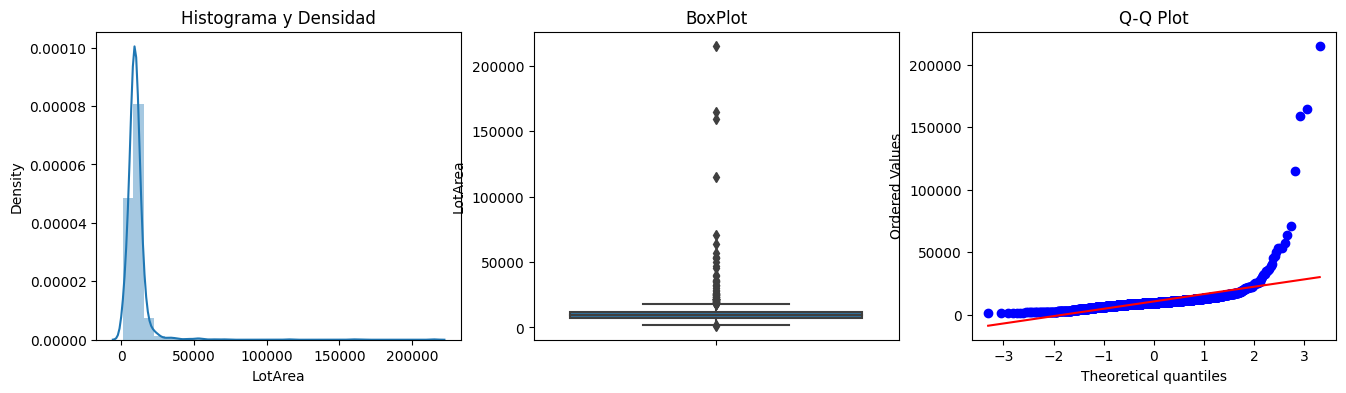

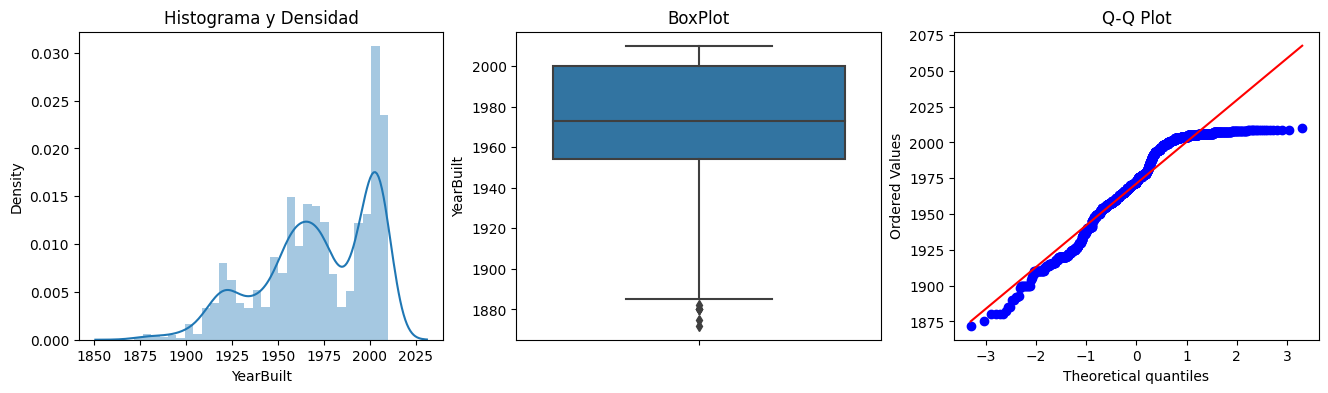

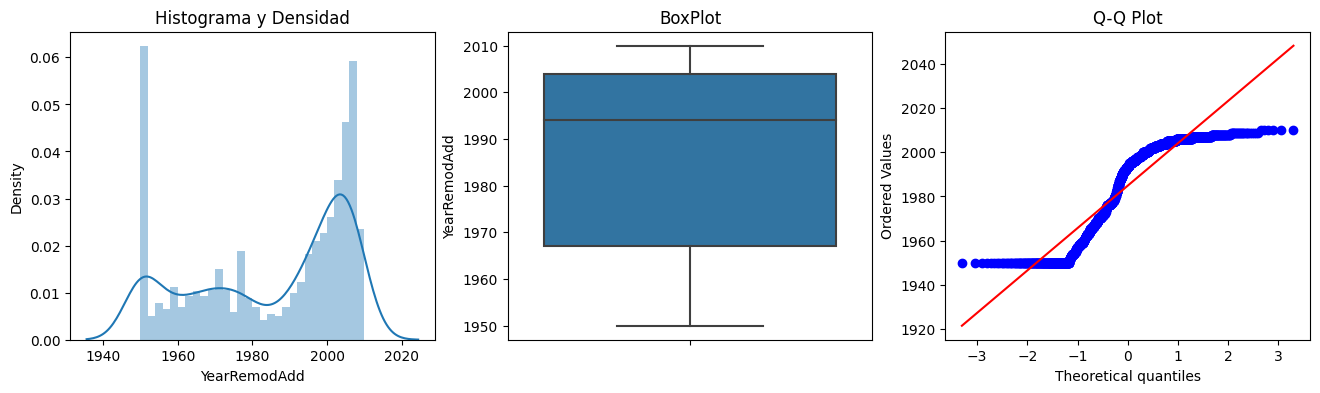

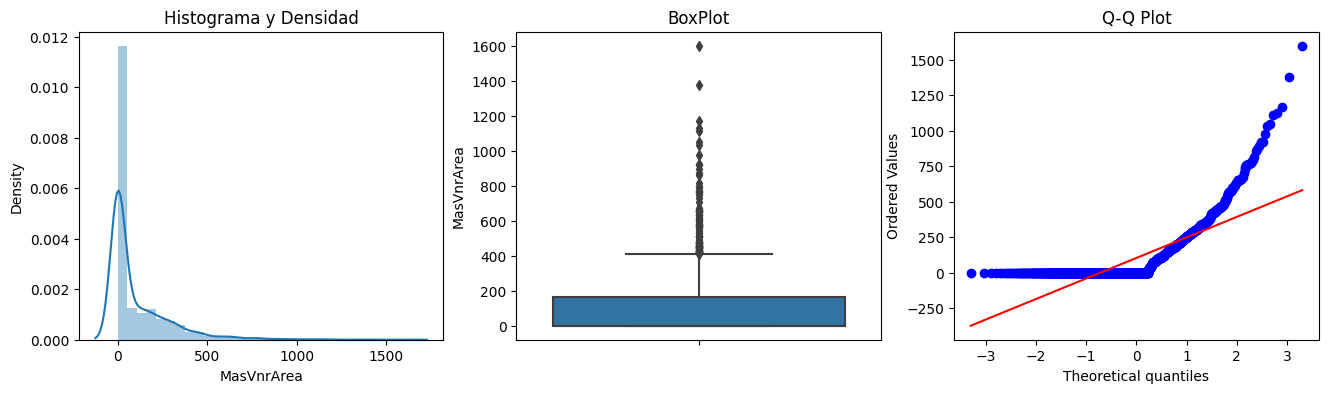

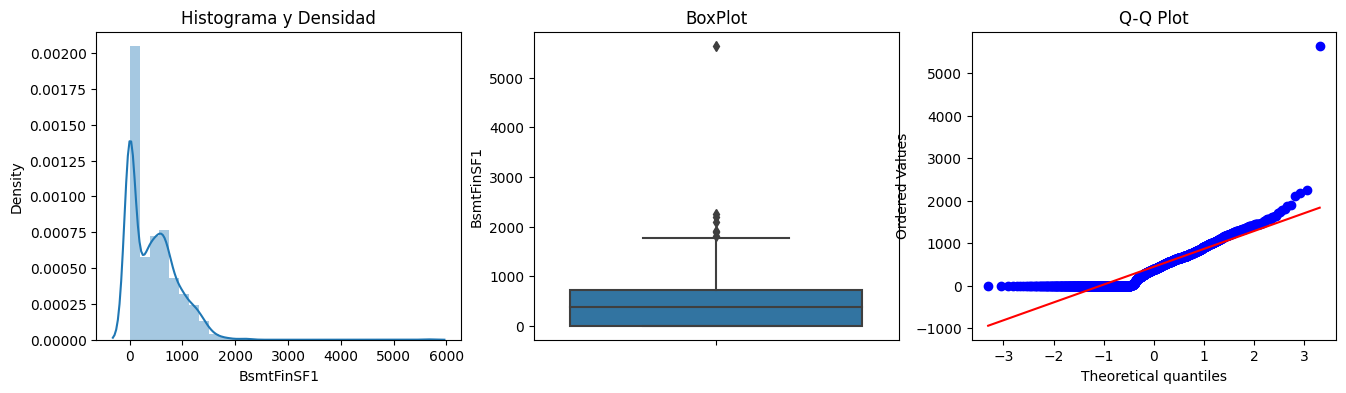

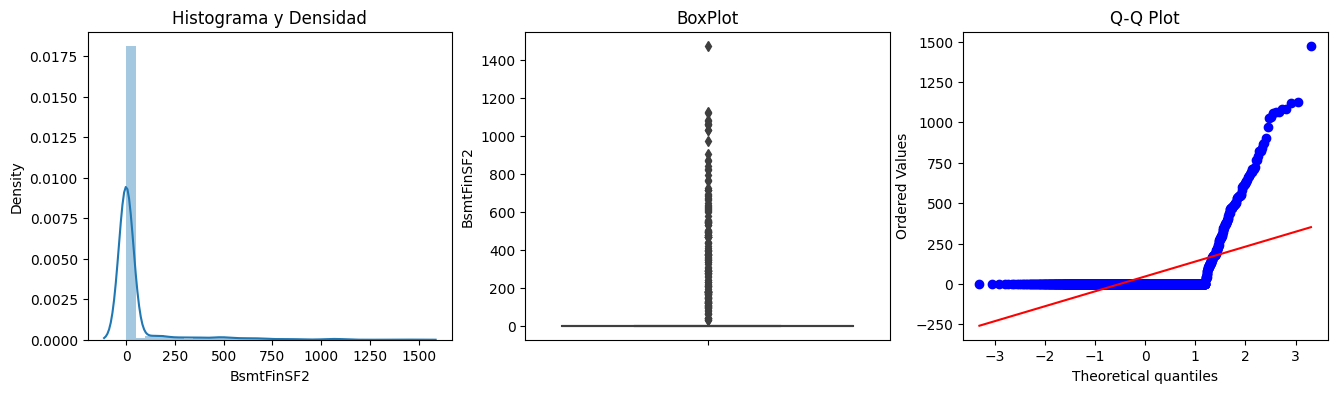

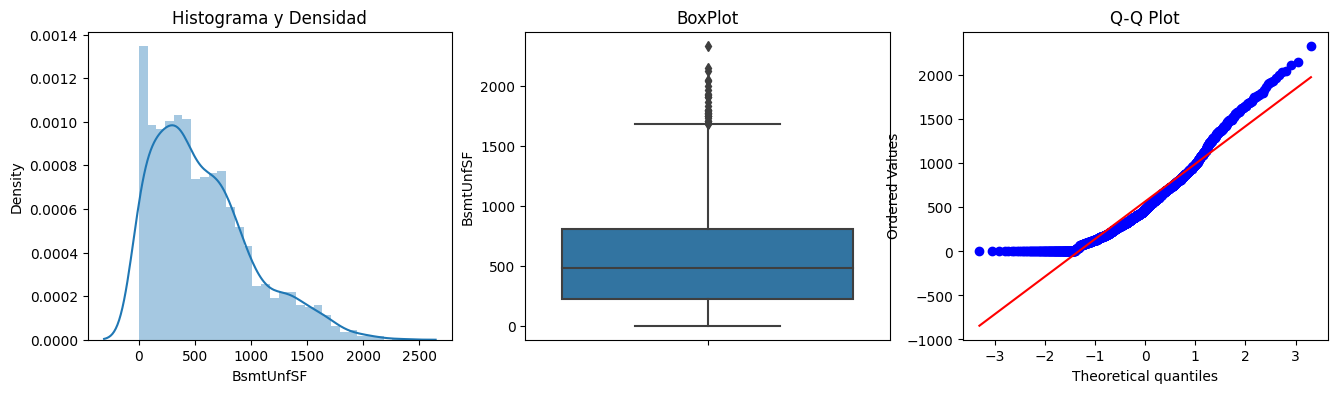

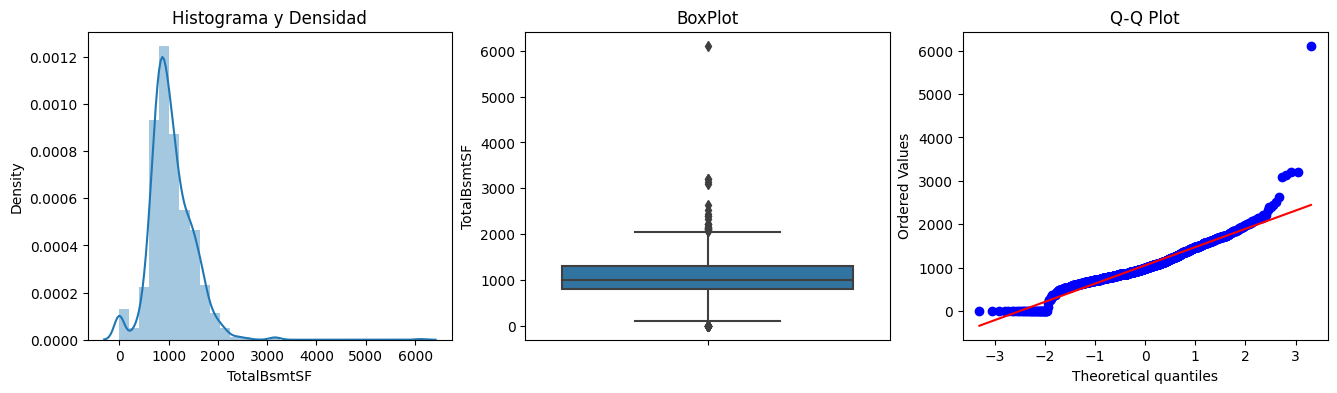

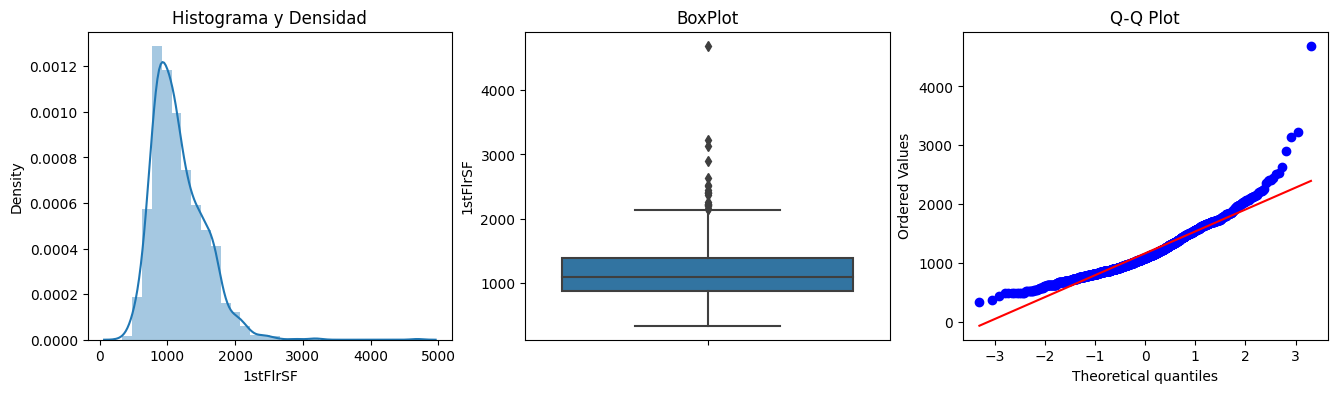

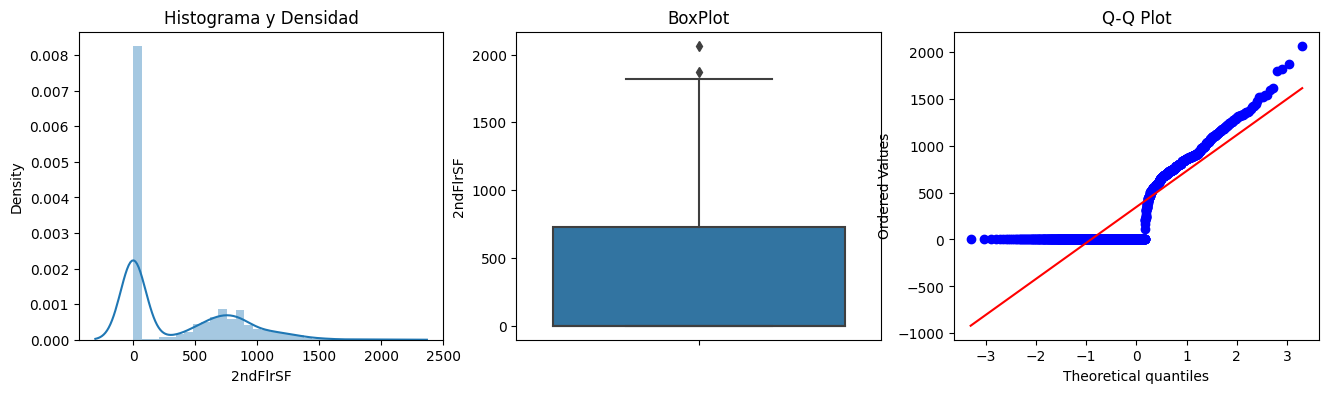

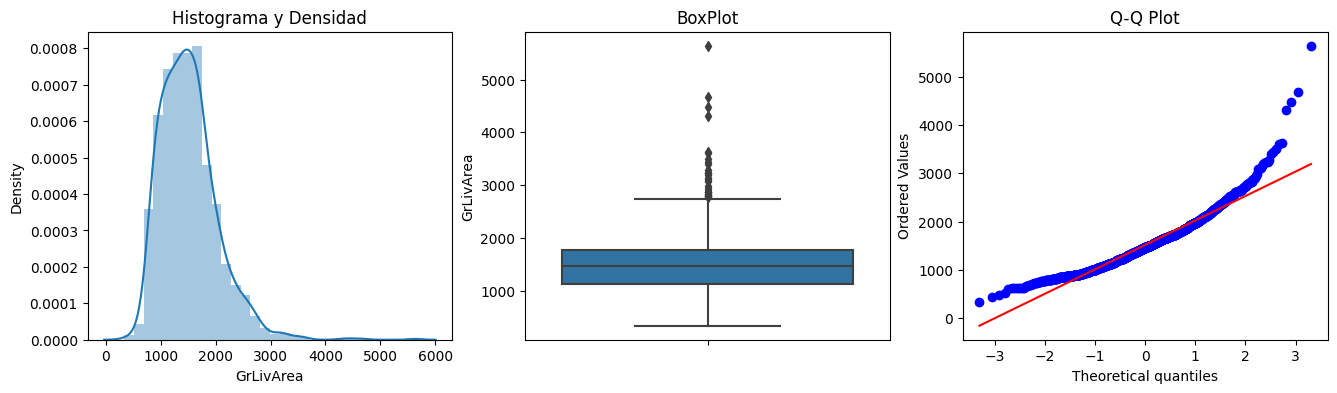

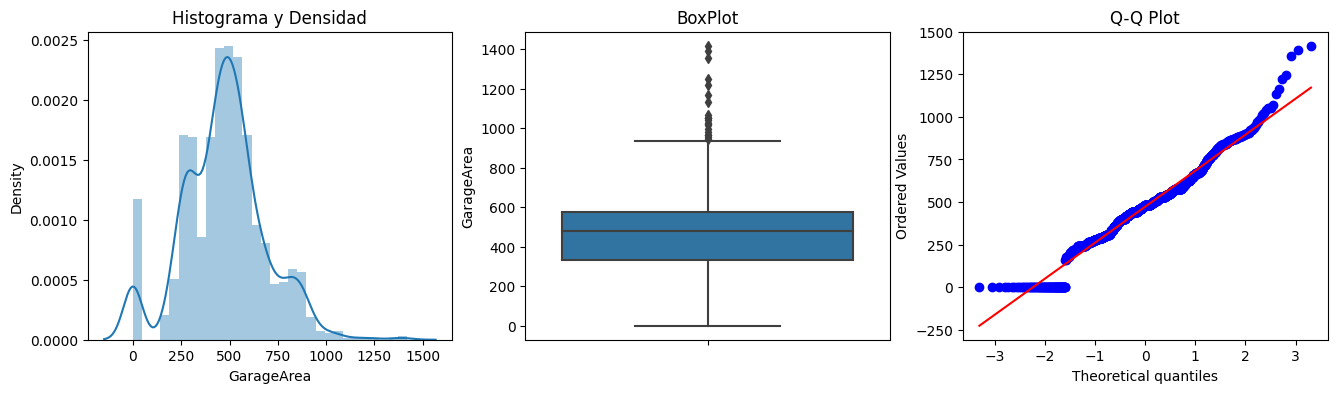

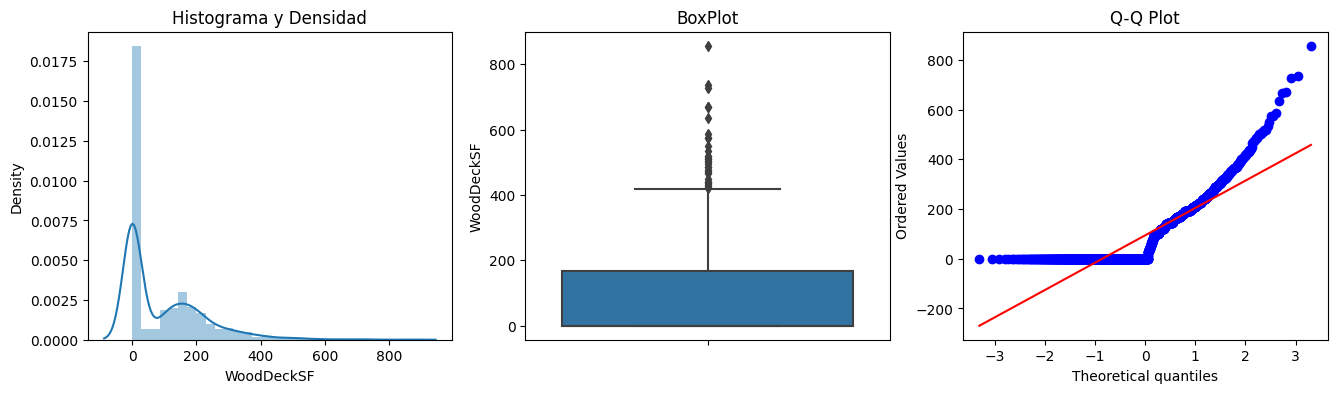

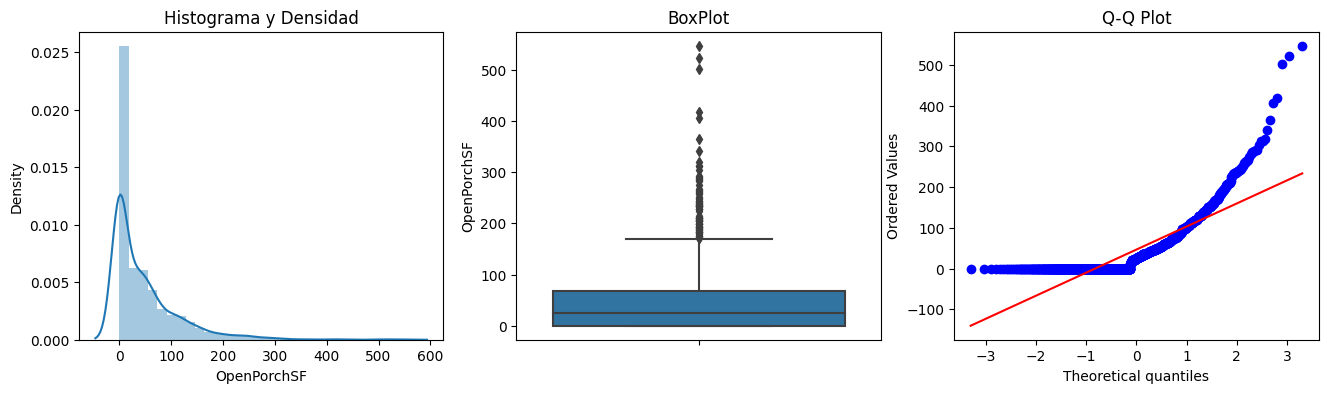

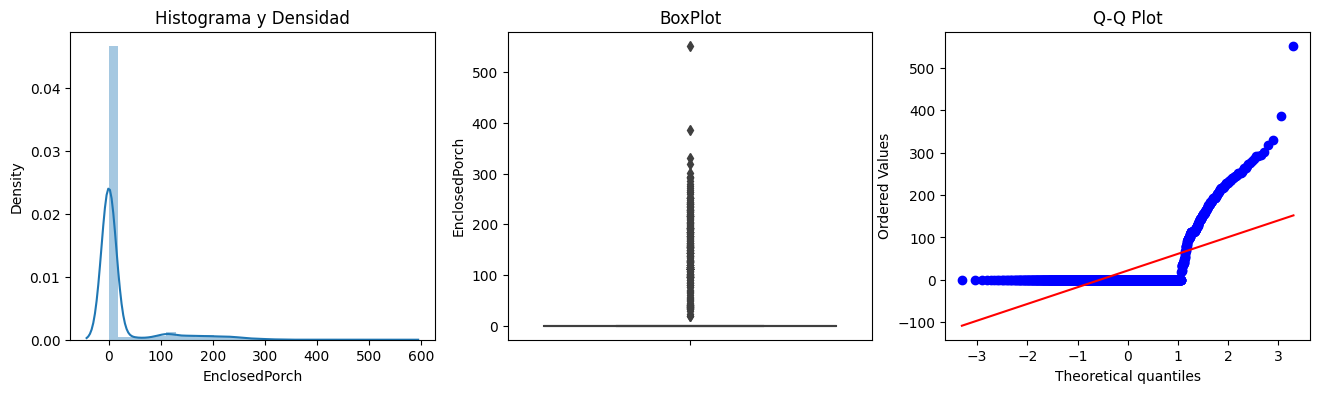

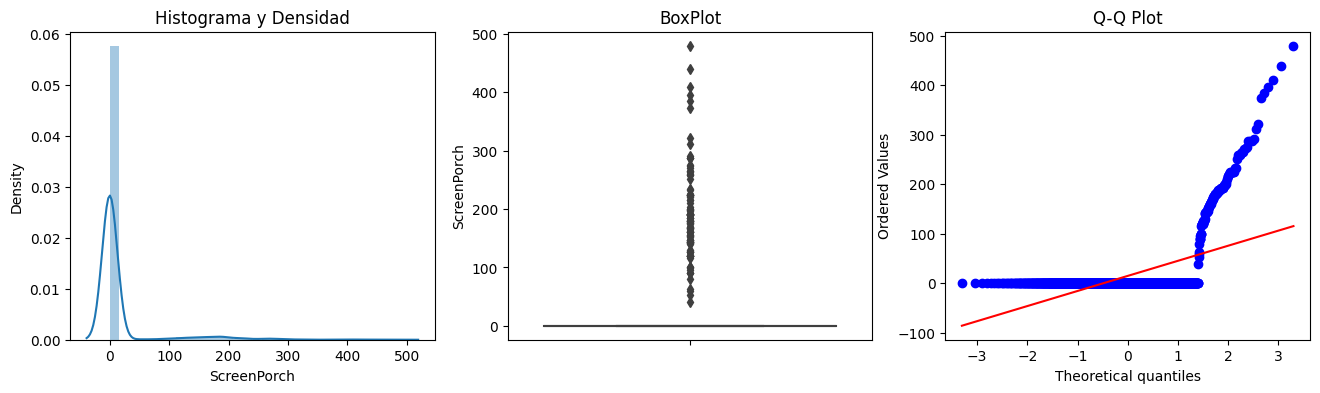

In [39]:
## Llamar la funcion de graficos
DetectOutliers()

In [61]:
## Generar los parametros IQR, LI y LS y procesar el Capping

def CappingOutlersLimits():
    '''Esta funcion genera el IQR, LI y LI de cada variable continua y sustituye cada valor outlier por el LI y LS cuando los excede
        Es decir reaiza el proceso de Capping.
        Entrada: No se ingresa nada, unicamente lee el arreglo definido anteriormente de las variables continuas, sobre el dataset nuevo.
        Salida: Data set nuevo con la sustitucion de valores'''
    for col in continuas:
        IQR=new_dataset[col].quantile(0.75)-new_dataset[col].quantile(0.25) #Q3 - Q1
        LI=new_dataset[col].quantile(0.25)-(IQR*1.75) #limite inferior
        LS=new_dataset[col].quantile(0.75)+(IQR*1.75)# limite superior
        if LI<0: #Evitar negativos 
            LI=0
        new_dataset[col]=np.where(new_dataset[col]>LS,LS,
                                    np.where(new_dataset[col]<LI ,LI,new_dataset[col])) ##Sustituir los outliers por los limites

In [62]:
## Llamar a la funcion de Capping para tratar los Outliers
CappingOutlersLimits()

C:\Users\LEONEL\AppData\Local\Temp\ipykernel_13652\4061867768.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset[col]=np.where(new_dataset[col]>LS,LS,
C:\Users\LEONEL\AppData\Local\Temp\ipykernel_13652\4061867768.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset[col]=np.where(new_dataset[col]>LS,LS,
C:\Users\LEONEL\AppData\Local\Temp\ipykernel_13652\4061867768.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\LEONEL\AppData\Local\Temp\ipykernel_13652\1710055119.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset[col],bins=30)
C:\Users\LEONEL\AppData\Local\Temp\ipykernel_13652\1710055119.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset[col],bins=30)
C:\Users\LEONE

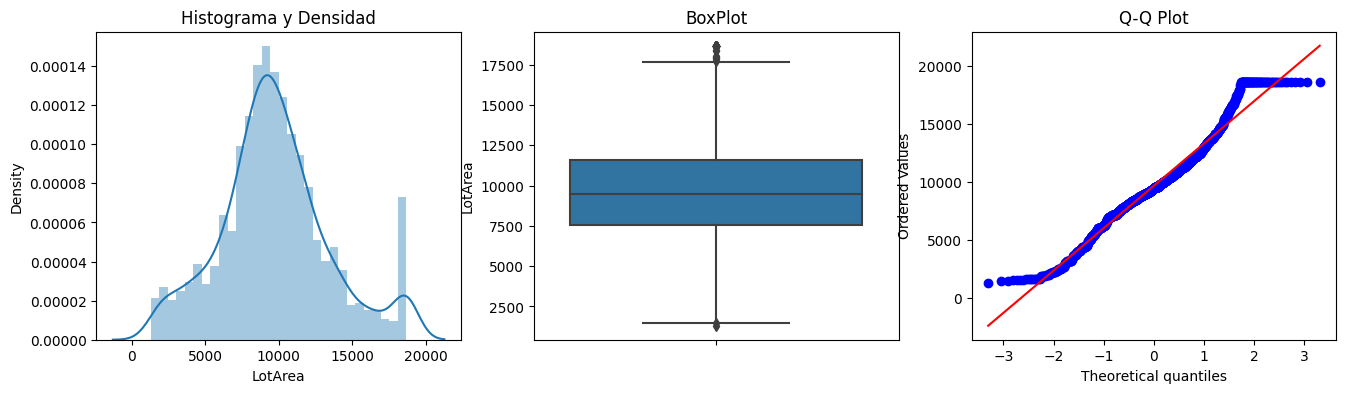

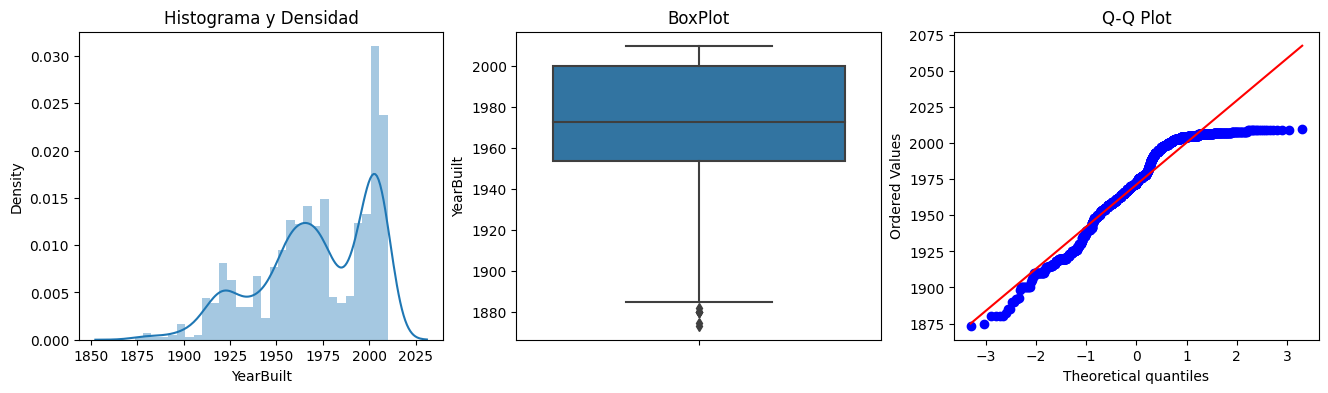

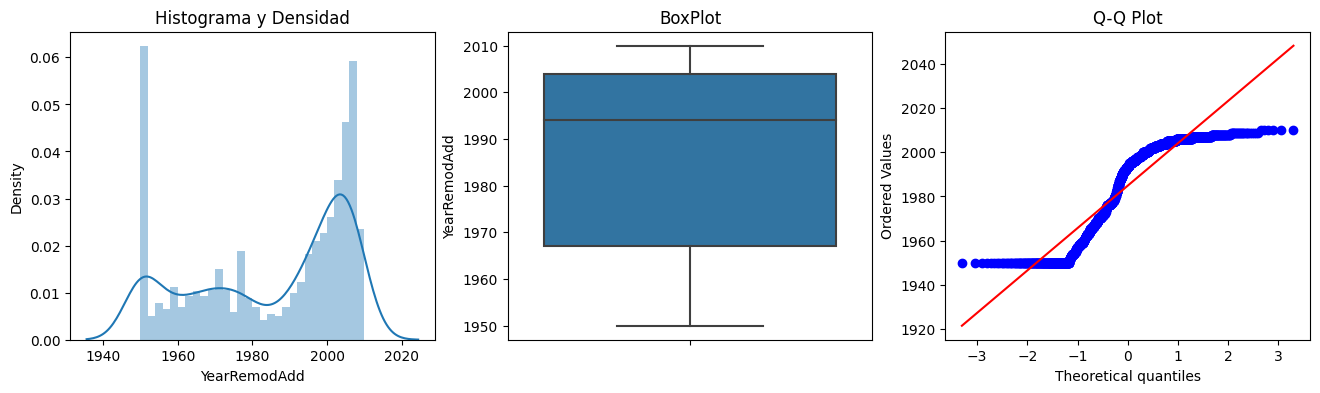

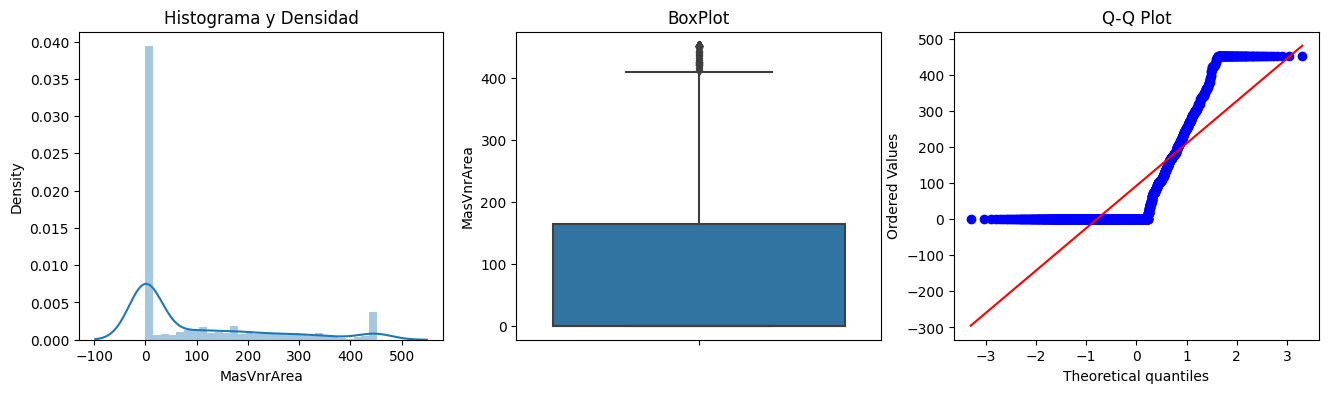

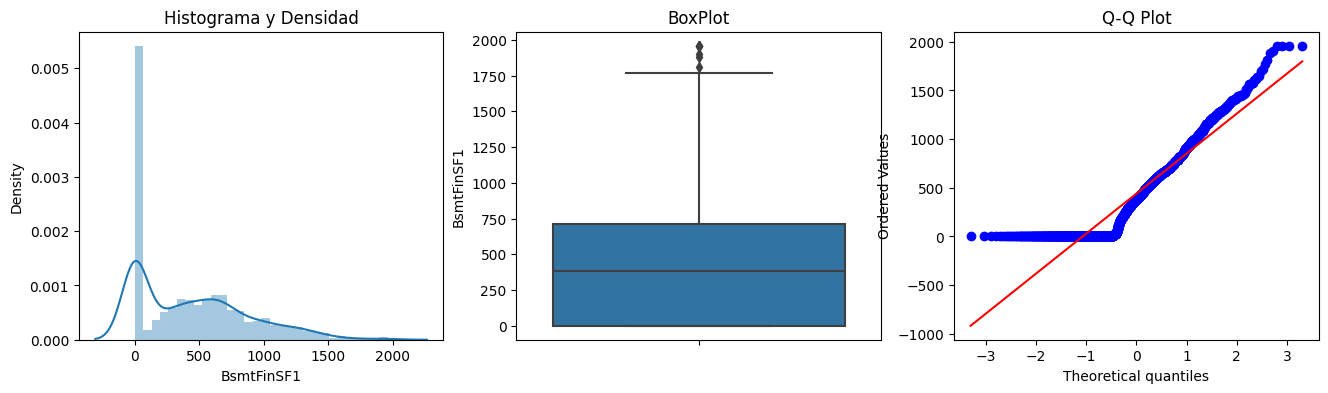

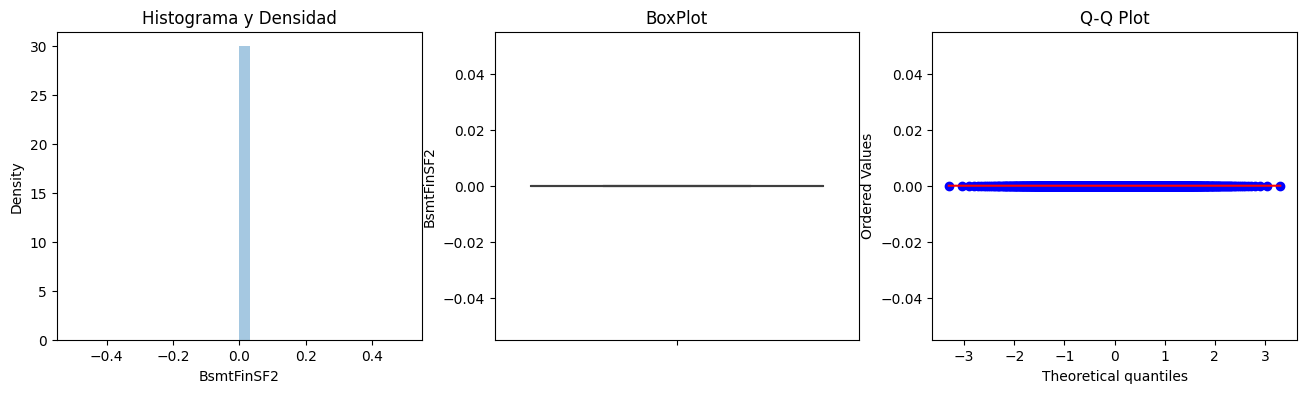

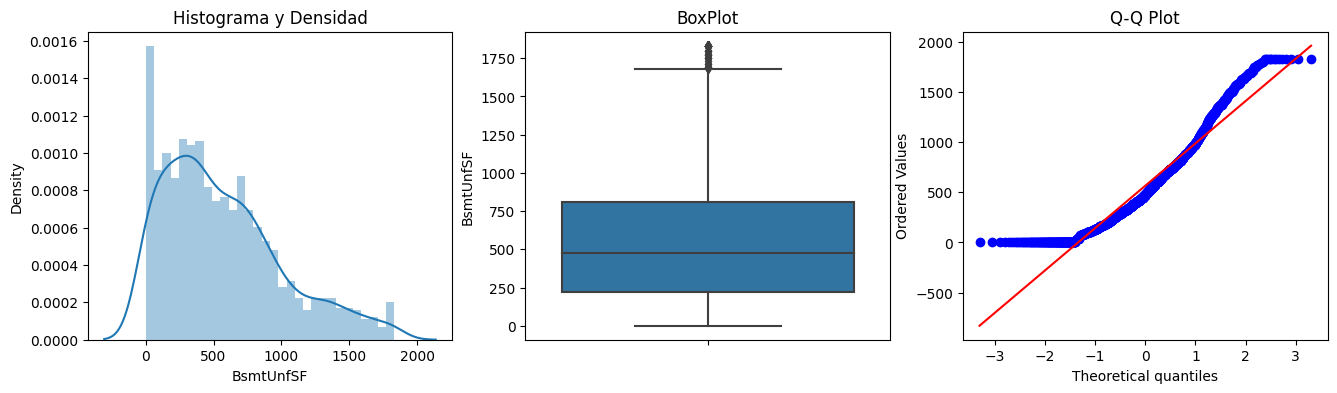

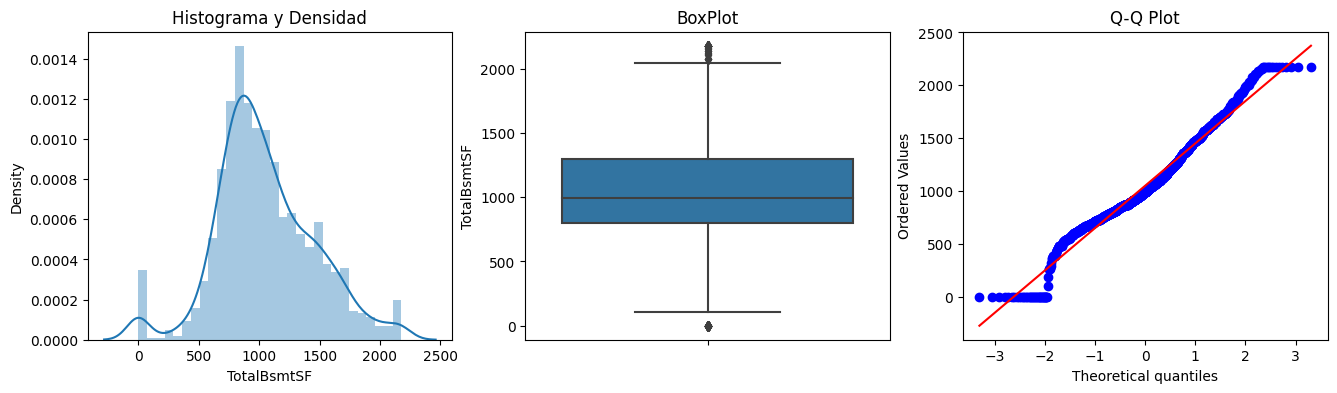

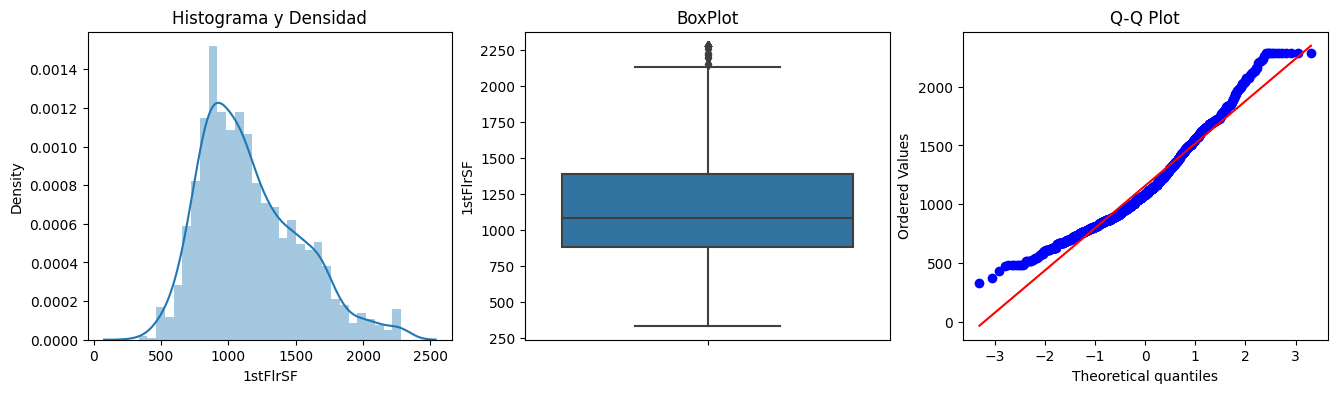

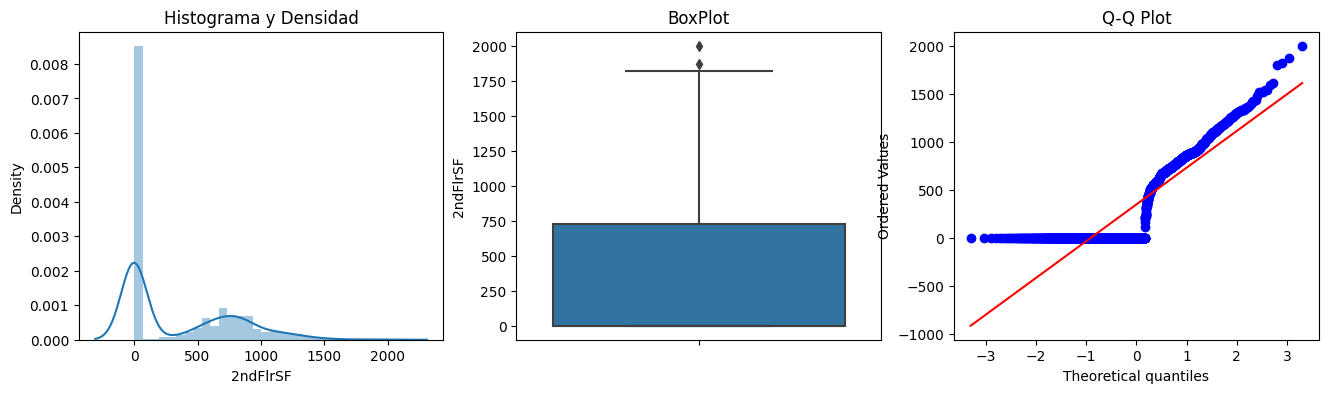

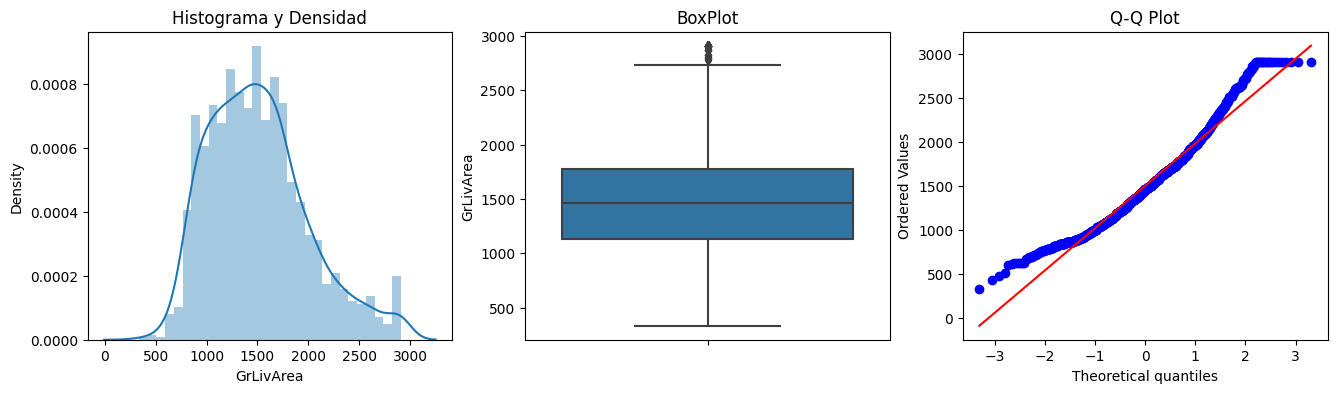

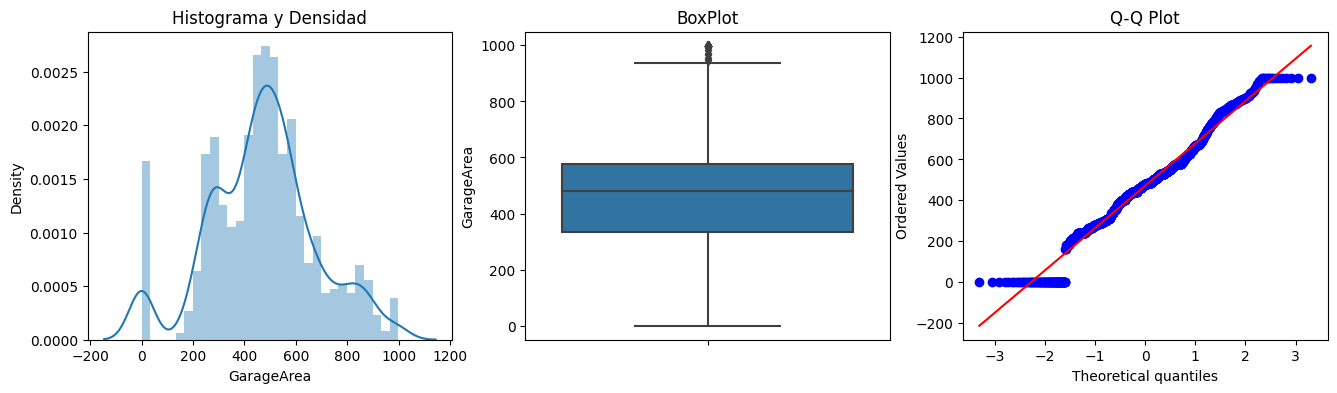

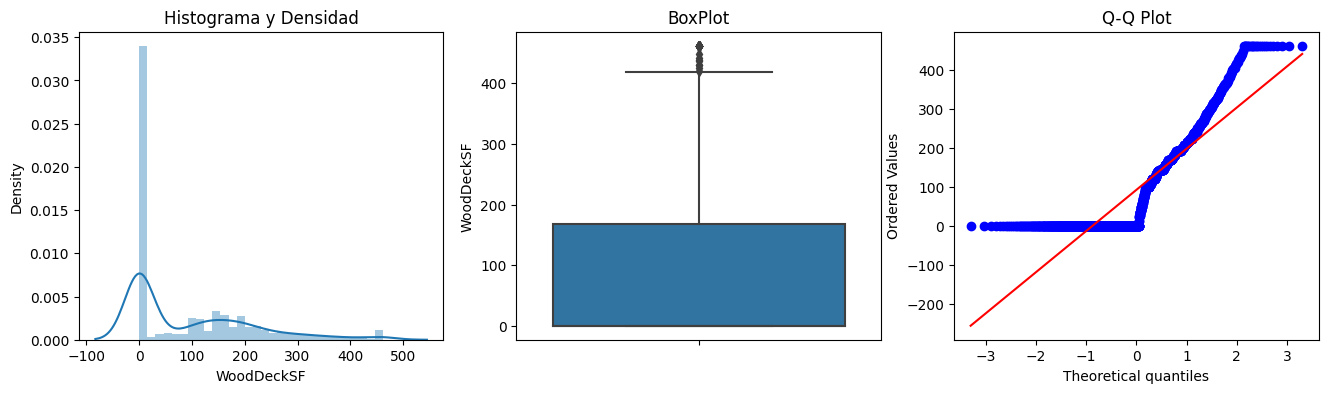

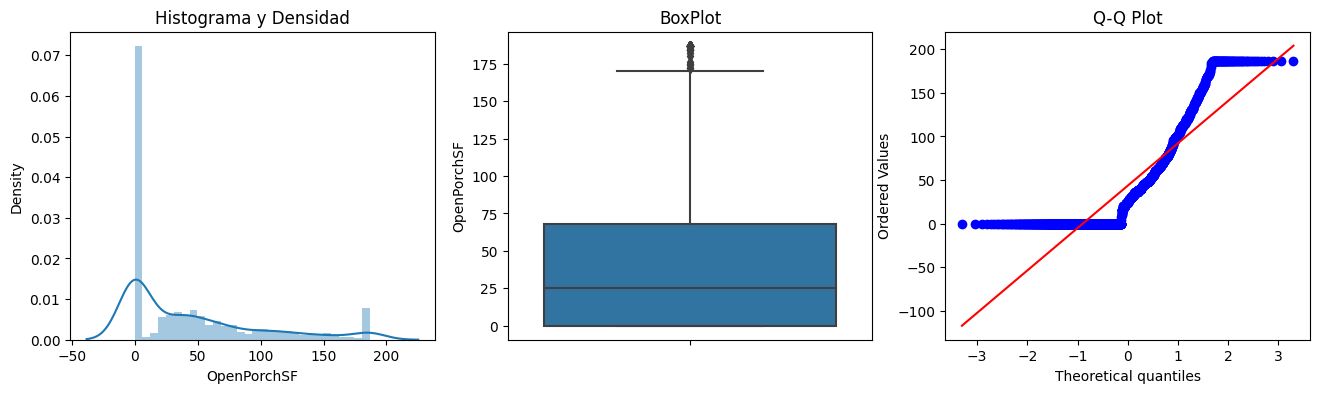

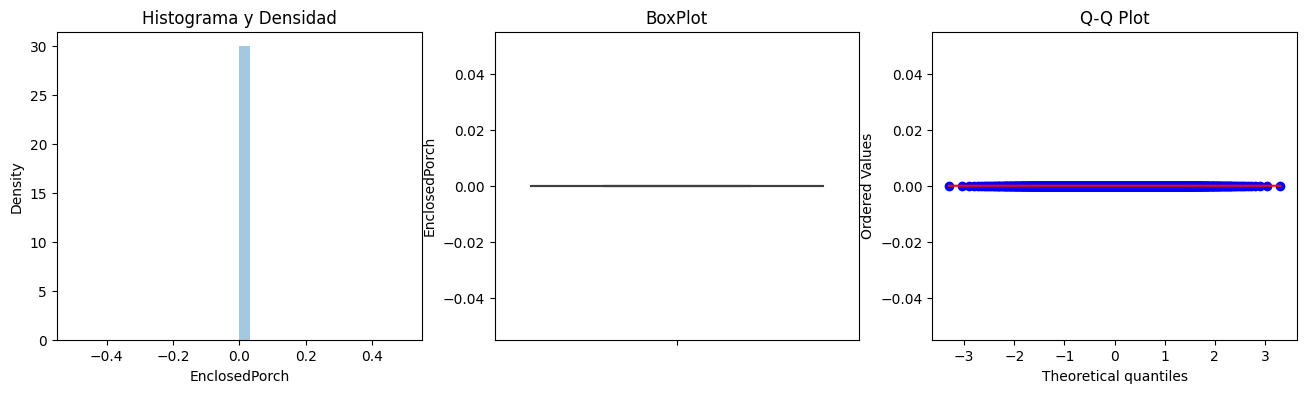

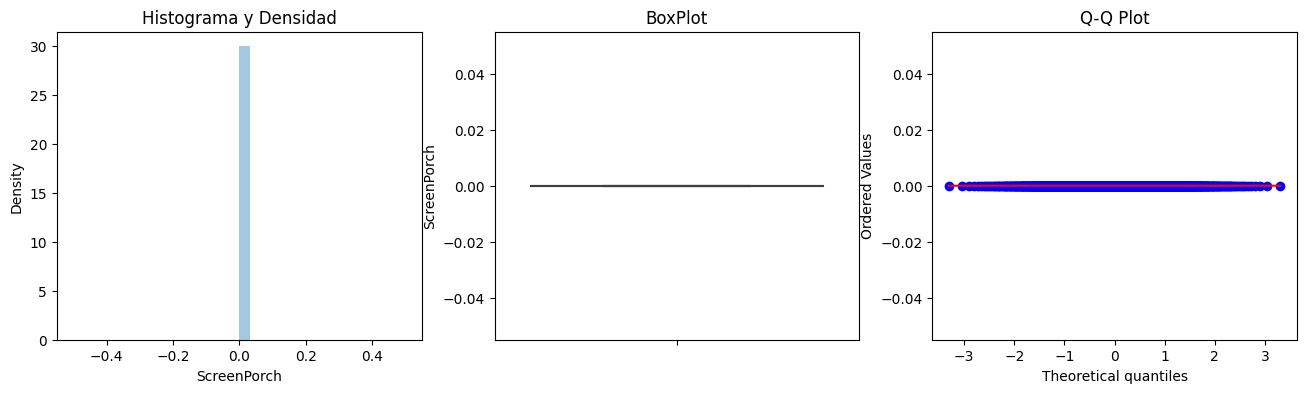

In [63]:
## Generar nuevamente la funcion que genera los graficos de outliers para observar los cambios.
DetectOutliers()